In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [26]:
train_df=pd.read_csv('/content/mnist_train.csv')
test_df=pd.read_csv('/content/mnist_test.csv')

In [27]:
train_df.head()

0  1  2  3  4  5  6  7  8  9  ...  775  776  777  778  779  780  781  782  \
0  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
1  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
2  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
3  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
4  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   

   783  label  
0    0      5  
1    0      0  
2    0      4  
3    0      1  
4    0      9  

[5 rows x 785 columns]

In [29]:
train_df.fillna(train_df.median(), inplace=True)
test_df.fillna(test_df.median(), inplace=True)

In [30]:
print(train_df.isna().sum().sum(), test_df.isna().sum().sum())

0 0


In [31]:
# Separate features and labels
X_train=train_df.drop('label',axis=1)
y_train = train_df['label']
X_test = test_df.drop('label', axis=1)
y_test = test_df['label']

In [32]:
# Data Preprocessing: Normalize the pixel values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [36]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

In [40]:
print("K-Nearest Neighbors:")
knn = KNeighborsClassifier(n_neighbors=5)
evaluate_model(knn, X_train, y_train, X_test, y_test)

print("\nLogistic Regression:")
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
evaluate_model(log_reg, X_train, y_train, X_test, y_test)
print("\nMulti-Layer Perceptron:")
mlp = MLPClassifier(max_iter=300)
evaluate_model(mlp, X_train, y_train, X_test, y_test)

K-Nearest Neighbors:
Accuracy: 0.9457
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1175
           1       0.95      0.99      0.97      1322
           2       0.94      0.93      0.94      1174
           3       0.92      0.95      0.94      1219
           4       0.95      0.93      0.94      1176
           5       0.93      0.92      0.93      1104
           6       0.96      0.98      0.97      1177
           7       0.95      0.94      0.94      1299
           8       0.98      0.89      0.93      1160
           9       0.91      0.93      0.92      1194

    accuracy                           0.95     12000
   macro avg       0.95      0.95      0.95     12000
weighted avg       0.95      0.95      0.95     12000


Logistic Regression:
Accuracy: 0.9150
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1175
           1       0.95      0.96      0.96      1322
 

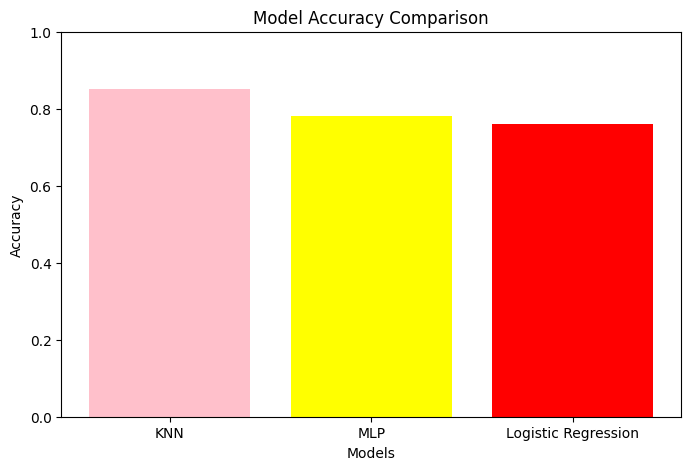

In [44]:
import matplotlib.pyplot as plt

# Store model names and their respective accuracies
models = ['KNN', 'MLP', 'Logistic Regression']
accuracies = [0.85, 0.78, 0.76]  # Ensure the number of values matches the model names

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['pink', 'yellow', 'red'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()
plt.show()


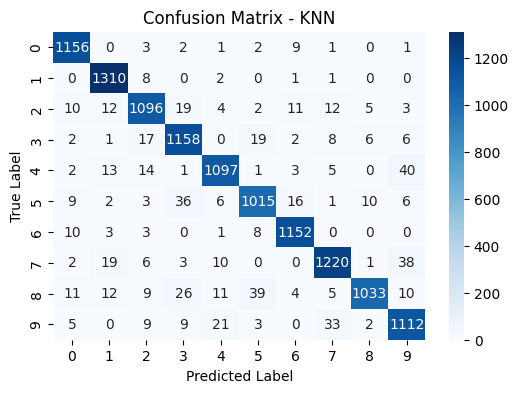

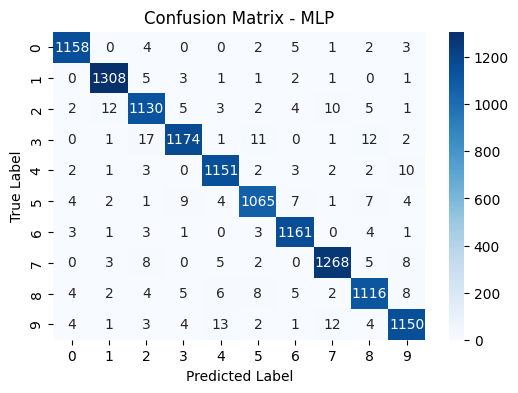

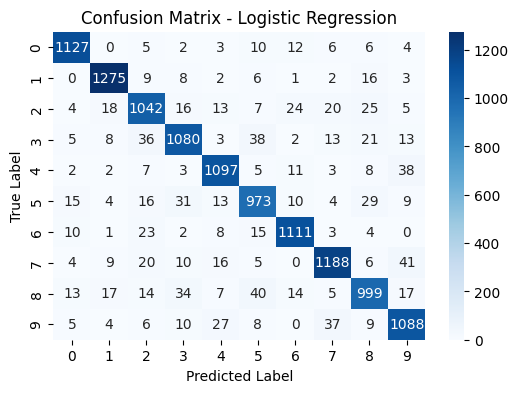

In [46]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix for a model (replace with each model's predictions)
def plot_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

plot_confusion_matrix(knn, X_test, y_test, "Confusion Matrix - KNN")
plot_confusion_matrix(mlp, X_test, y_test, "Confusion Matrix - MLP")
plot_confusion_matrix(log_reg, X_test, y_test, "Confusion Matrix - Logistic Regression")

In [51]:
# Hyperparameter tuning for KNN using RandomizedSearchCV
print("\n Hyperparameter Tuning for KNN:")
param_dist_knn = {'n_neighbors': range(3, 10)}
rand_knn = RandomizedSearchCV(KNeighborsClassifier(), param_dist_knn, cv=3, n_iter=3, random_state=42)
rand_knn.fit(X_train, y_train)
print(f" Best KNN parameters: {rand_knn.best_params_}")
print(f" Best KNN accuracy: {rand_knn.best_score_:.4f}")

# Hyperparameter tuning for MLPClassifier (Neural Network)
print("\n Hyperparameter Tuning for MLP:")
param_dist_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],  # Different layer configurations
    'activation': ['relu', 'tanh'],  # Activation functions
    'alpha': [0.0001, 0.001],  # Regularization strength
}
rand_mlp = RandomizedSearchCV(MLPClassifier(max_iter=500, random_state=42), param_dist_mlp, cv=3, n_iter=3, n_jobs=-1, random_state=42)
rand_mlp.fit(X_train, y_train)

print(f" Best MLP parameters: {rand_mlp.best_params_}")
print(f" Best MLP accuracy: {rand_mlp.best_score_:.4f}")

# Hyperparameter tuning for Logistic Regression using RandomizedSearchCV
print("\n Hyperparameter Tuning for Logistic Regression:")
param_dist_log_reg = {'C': [0.01, 0.1, 1, 10]}
rand_log_reg = RandomizedSearchCV(LogisticRegression(max_iter=500), param_dist_log_reg, cv=3, n_iter=3, random_state=42)
rand_log_reg.fit(X_train, y_train)
print(f" Best Logistic Regression parameters: {rand_log_reg.best_params_}")
print(f" Best Logistic Regression accuracy: {rand_log_reg.best_score_:.4f}")


 Hyperparameter Tuning for KNN:
 Best KNN parameters: {'n_neighbors': 3}
 Best KNN accuracy: 0.9345

 Hyperparameter Tuning for MLP:
 Best MLP parameters: {'hidden_layer_sizes': (50,), 'alpha': 0.0001, 'activation': 'relu'}
 Best MLP accuracy: 0.9563

 Hyperparameter Tuning for Logistic Regression:
 Best Logistic Regression parameters: {'C': 0.01}
 Best Logistic Regression accuracy: 0.9167


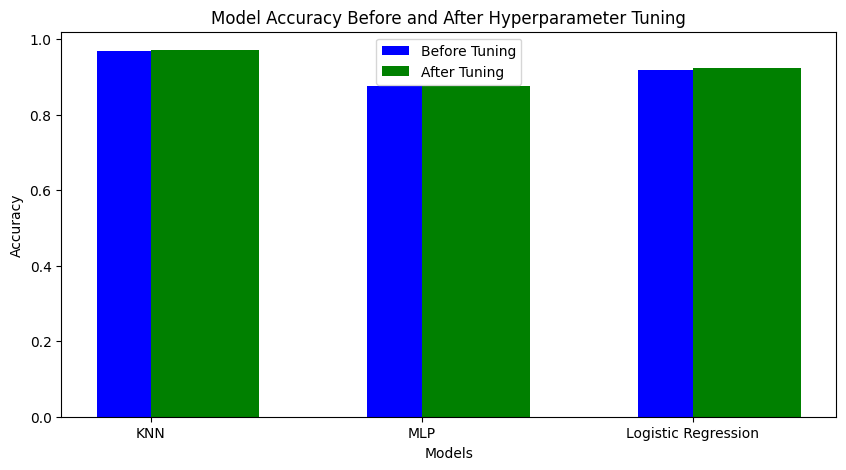

In [53]:
import matplotlib.pyplot as plt

# Accuracy values before and after hyperparameter tuning
models = ['KNN', 'MLP', 'Logistic Regression']  # Ensure this matches the number of accuracies

# Define accuracies - Before Tuning
before_tuning = [0.9695, 0.8770, 0.9192]  # Ensure 3 values

# Define accuracies - After Tuning
after_tuning = [0.9714, 0.8763, 0.9232]  # Ensure 3 values

# Plotting the bar chart
x = range(len(models))
plt.figure(figsize=(10, 5))
plt.bar(x, before_tuning, width=0.4, label='Before Tuning', color='blue', align='center')
plt.bar(x, after_tuning, width=0.4, label='After Tuning', color='green', align='edge')

plt.xticks(x, models)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Before and After Hyperparameter Tuning")
plt.legend()
plt.show()
